In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [4]:
df = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='latin-1')
print("Data read successfully!")

Data read successfully!


In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.shape

(15509, 10)

In [8]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [10]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


We need to now remove the missing values

In [12]:
df.dropna(inplace=True)


In [13]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Missing values removed

In [14]:
df.shape[0]

5659

In [16]:
df.shape

(5659, 10)

In [17]:
df['Votes'] = df['Votes'].str.replace(',','').astype('int')


In [18]:
df['Year'] = df['Year'].str.strip('()').astype(int)


We now change the votes and year into integer

In [19]:
df['Duration'] = df['Duration'].str.strip('min')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


the votes and year are no longer objects

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

importing lib for plotting

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


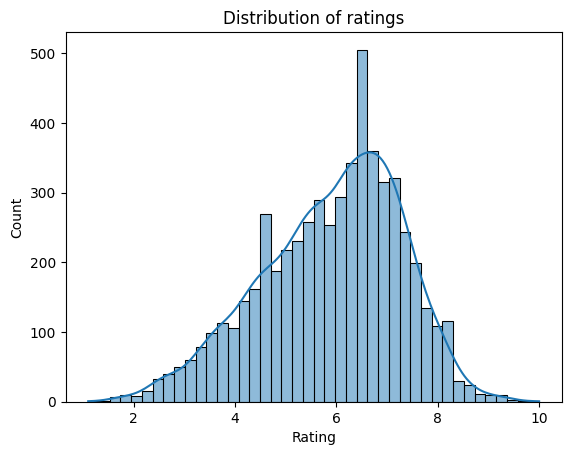

In [28]:
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

Visualizing the ratings

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


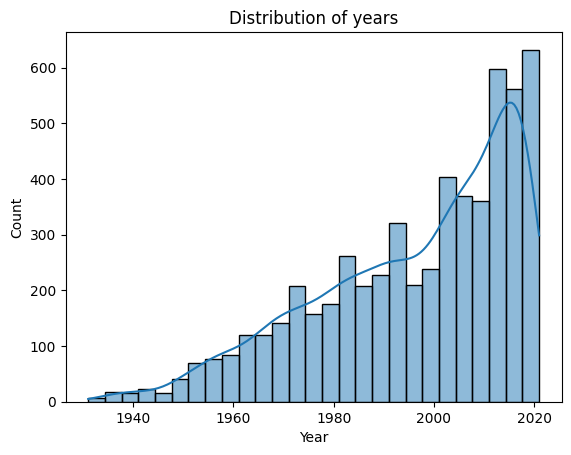

In [29]:
sns.histplot(data=df,x='Year',kde=True)
plt.title('Distribution of years')
plt.show()

Visualizing the years

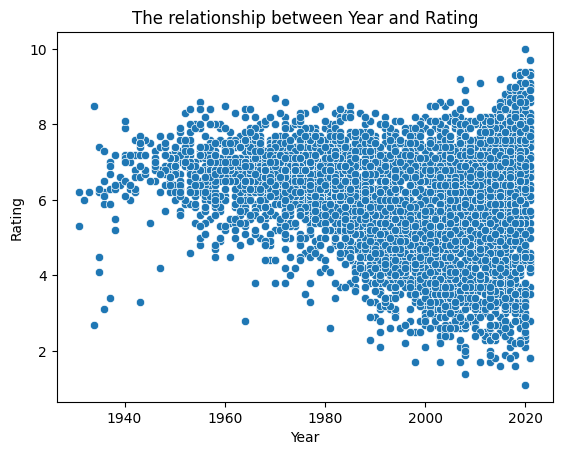

In [30]:
sns.scatterplot(data=df,x='Year',y='Rating')
plt.title("The relationship between Year and Rating")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


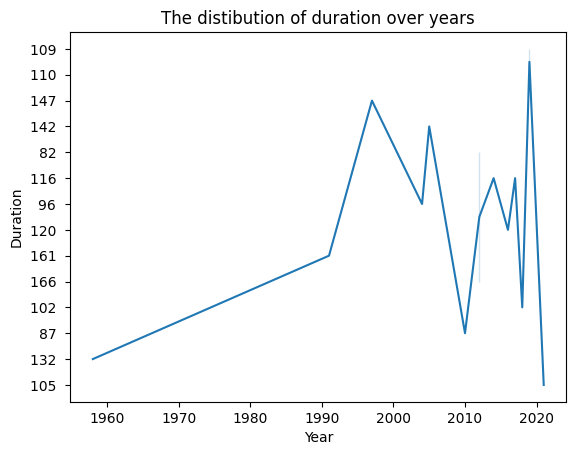

In [31]:
sns.lineplot(data=df.head(15),x='Year',y='Duration')
plt.title('The distibution of duration over years')
plt.show()

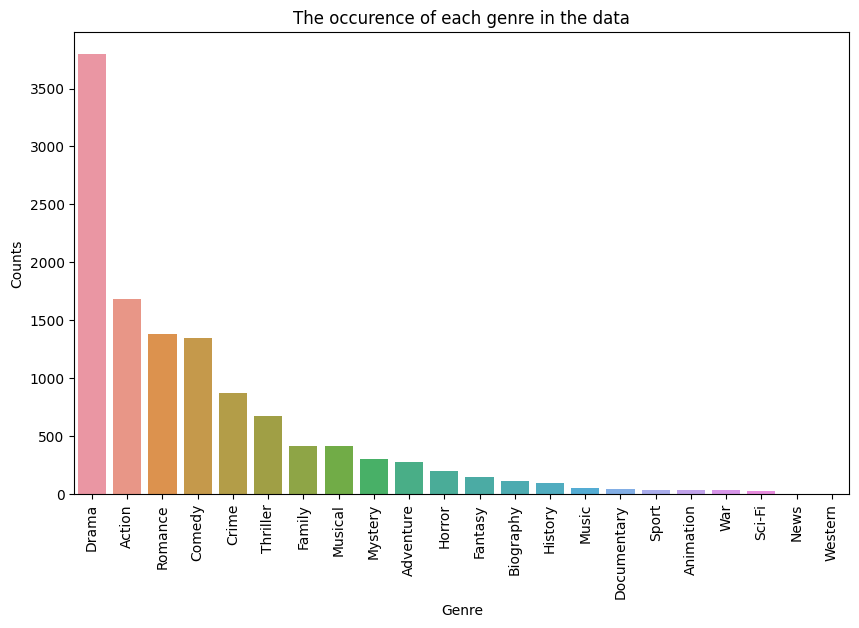

In [32]:
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
plt.figure(figsize=(10,6))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The occurence of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

This shows the frequency of a certain genre in the dataset

In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
encoder = LabelEncoder()
df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Director'] = encoder.fit_transform(df['Director'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [36]:
df2 = df.drop('Name',axis=1)


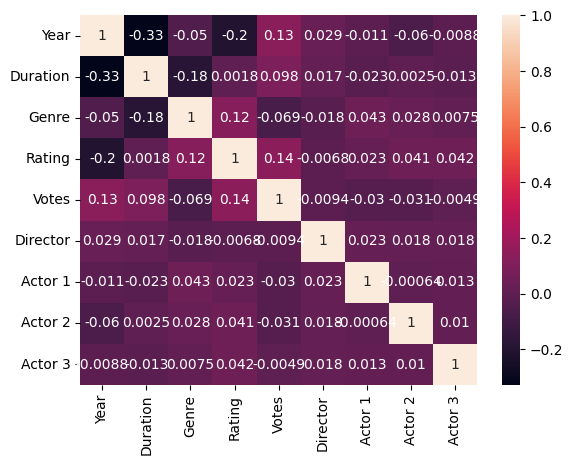

In [37]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X = df2.drop('Rating',axis=1)
y= df2['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [44]:
#initialoze the model, we are using linear regression which is a basic supervised learning algorithm
model = LinearRegression()
#Fiting the training data
model.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([5.63683425, 5.84694164, 5.93283536, ..., 6.02786817, 5.89959597,
       5.36480764])

In [46]:
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")

Mean Absolute Error : 1.0355603579570465
Mean Squared Error : 1.6737798290839632


In [47]:
print(f"R2 score : {r2_score(y_test,y_pred)}")

R2 score : 0.08633120473998979


R2 score is basically measures how good our model is performing